<a href="https://colab.research.google.com/github/hiirudra/Cardiovascular-Disease-Prediction/blob/main/ML_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mini Project : Random Forest (Project 5)

###To build an application to classify the patient to be healthy or suffering from
###cardiovascular disease based on the given attributes:

###such as
* ###  age,
* ###  gender,
* ###  systolic blood pressure,
* ###  diastolic blood pressure etc.

###Macro Skills: EDA, Feature Selection, Performance Metrics

###Micro Skills: Plot a suitable graph for analyzing given dataset


Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


Mounting Google drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the csv file from the drive

In [18]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Mini Project-1/cardio_train.csv')

In [19]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [20]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [21]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
data.shape

(70000, 13)

In [23]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Encoding the 'gender' column from `1 and 2` to `1 and 0`

In [24]:
data.gender.replace([1,2], [1,0], inplace=True)
data.head()
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,0,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,0,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Removing irrevlevent features from the dataset

In [25]:
data.drop('id', axis = 1, inplace = True)
data.shape

(70000, 12)

Removing duplicate data points from the dataset

In [26]:
data.drop_duplicates(inplace=True)
data.shape

(69976, 12)

###Removing outliers


> Removing negative `'ap_hi'` and `'ap_lo'` values.

> Removing non practical samples from `'ap_hi'` and `'ap_lo'`.

> Adding a `'bmi'` feature so as to remove outliers based on height and weight of the patients.


In [27]:
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]
data["bmi"] = data["weight"] / (data["height"]/100)**2
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000
mean,19463.874433,0.651207,164.359681,74.121414,126.324842,81.334585,1.364509,1.225937,0.087901,0.053614,0.803277,0.494947,27.525663
std,2468.389304,0.476592,8.205382,14.329915,17.710918,9.874490,0.678783,0.571896,0.283154,0.225255,0.397524,0.499978,6.081430
min,10798.000000,0.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,17657.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,21323.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,23713.000000,1.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


###Outlier Analysis using Boxplot

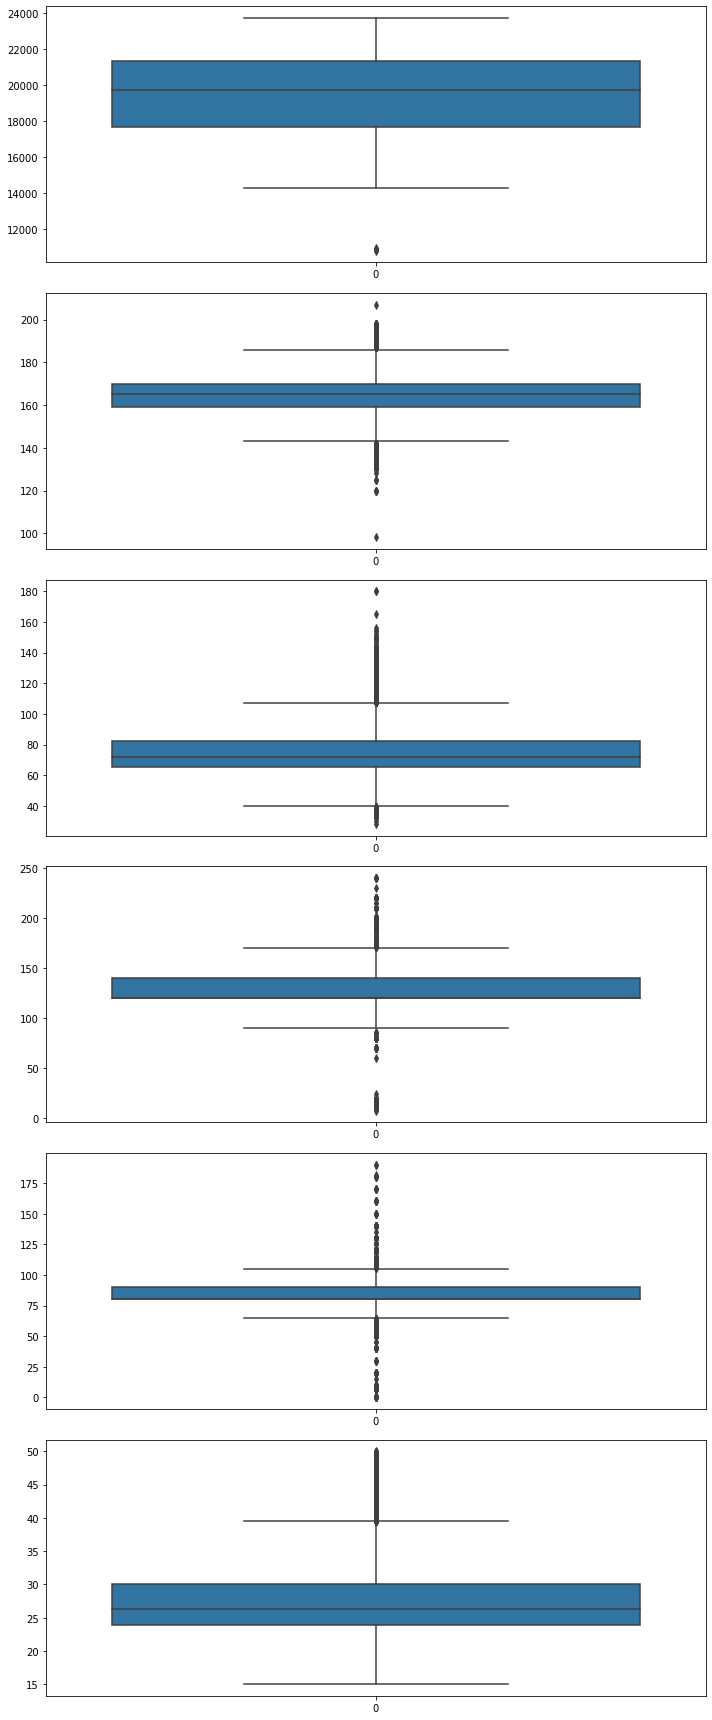

In [46]:
fig,axs = plt.subplots(6,figsize = (10, 24))
plt1 = sns.boxplot(data['age'], ax = axs[0])
plt1 = sns.boxplot(data['height'], ax = axs[1])
plt1 = sns.boxplot(data['weight'], ax = axs[2])
plt1 = sns.boxplot(data['ap_hi'], ax = axs[3])
plt1 = sns.boxplot(data['ap_lo'], ax = axs[4])
plt1 = sns.boxplot(data['bmi'], ax = axs[5])
plt.tight_layout()
plt.show()

###: Practical BMI range: 15 - 60


In [29]:
data[data['bmi']<15].count()

age            26
gender         26
height         26
weight         26
ap_hi          26
ap_lo          26
cholesterol    26
gluc           26
smoke          26
alco           26
active         26
cardio         26
bmi            26
dtype: int64

In [30]:
data[data['bmi']>50].count()

age            237
gender         237
height         237
weight         237
ap_hi          237
ap_lo          237
cholesterol    237
gluc           237
smoke          237
alco           237
active         237
cardio         237
bmi            237
dtype: int64

#Removing outliers from `'bmi'` column

In [31]:
out_filter3 = ((data["bmi"]<15) | (data["bmi"]>50))
data = data[~out_filter3]
data.count()

age            68712
gender         68712
height         68712
weight         68712
ap_hi          68712
ap_lo          68712
cholesterol    68712
gluc           68712
smoke          68712
alco           68712
active         68712
cardio         68712
bmi            68712
dtype: int64

After removing the outliers from the main dataset, the data is now cleaned and can be used for the future predictions and observations.

###Variation Analysis using distplot

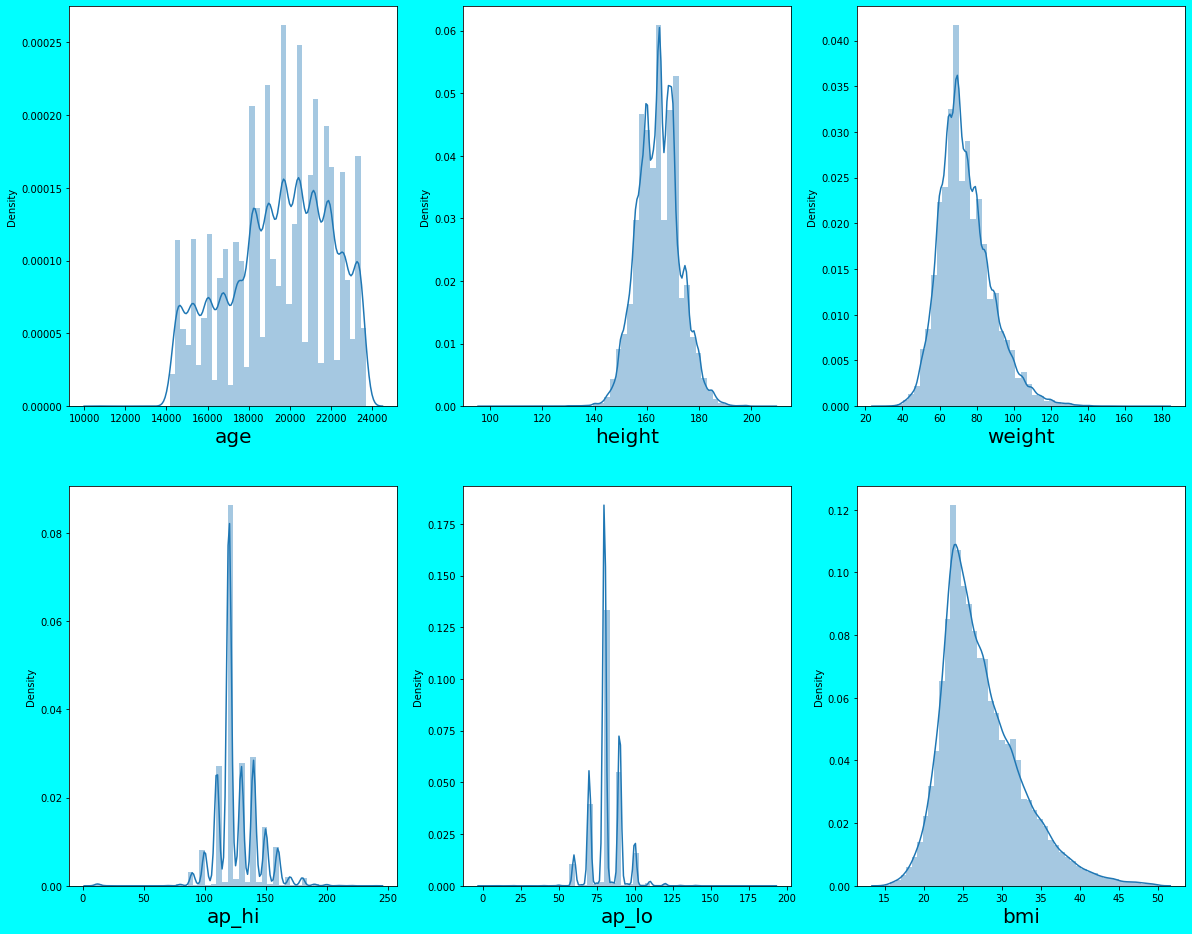

In [32]:
data1 = ['age','height','weight','ap_hi','ap_lo','bmi']
plt.figure(figsize = (20,25),facecolor = 'aqua')
plotnumber = 1
for column in data1:
  if plotnumber <= 6:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber += 1
plt.show()

###Description of Categorical data using Countplot

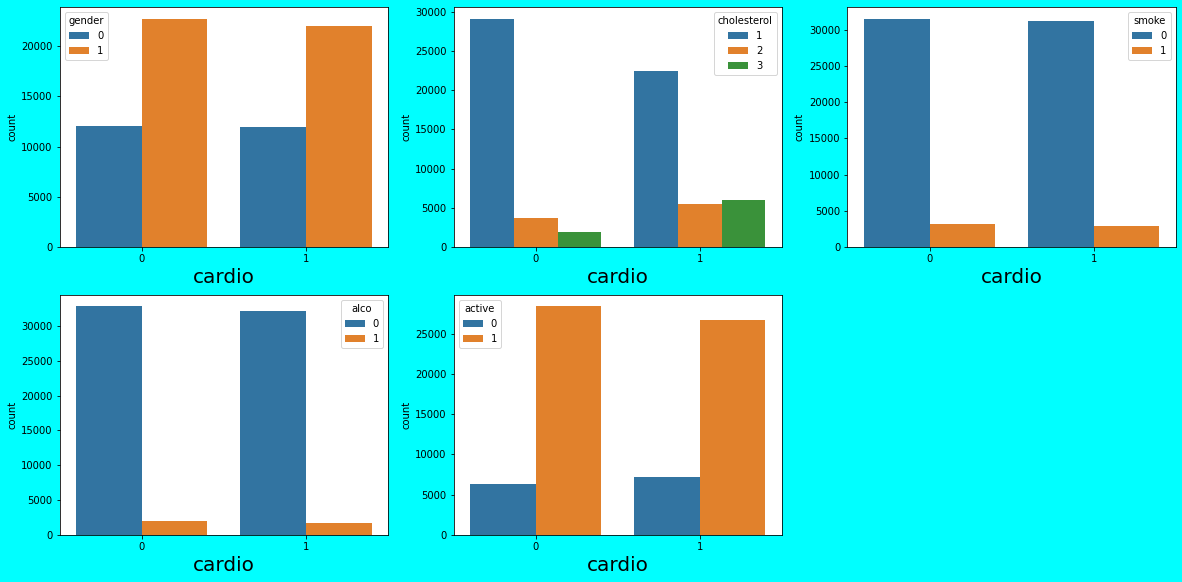

In [33]:
data1 = ['gender','cholesterol','smoke','alco','active']
plt.figure(figsize = (20,15),facecolor = 'aqua')
plotnumber = 1
for i in data1:
  if plotnumber <= 6:
    ax = plt.subplot(3,3,plotnumber)
    sns.countplot(x = 'cardio', hue = i, data = data)
    plt.xlabel('cardio',fontsize = 20)
  plotnumber += 1
plt.show()

###Defining the target variable for applying Random Forest Classifier
Here, target variable is `'cardio'` which determines whether the choosen patient has CardioVascular Disease or not.

In [34]:
target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

Splitting the dataset into `70%` training data and `30%` testing data.

Random state is to be taken as 0

In [35]:
from sklearn.model_selection import train_test_split
train, test, target, target_test = train_test_split(data, data_target, test_size=0.3, random_state=0)

In [36]:
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
1094,21740,1,172,70.0,130,90,1,2,0,0,1,23.661439
67991,19037,0,162,84.0,170,100,2,1,0,1,1,32.007316
39032,20668,0,170,66.0,170,100,1,1,1,0,1,22.837370
41782,17442,0,181,105.0,135,90,1,1,0,0,1,32.050304
26084,21821,1,156,64.0,150,90,1,2,0,0,1,26.298488


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48098 entries, 1094 to 69547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          48098 non-null  int64  
 1   gender       48098 non-null  int64  
 2   height       48098 non-null  int64  
 3   weight       48098 non-null  float64
 4   ap_hi        48098 non-null  int64  
 5   ap_lo        48098 non-null  int64  
 6   cholesterol  48098 non-null  int64  
 7   gluc         48098 non-null  int64  
 8   smoke        48098 non-null  int64  
 9   alco         48098 non-null  int64  
 10  active       48098 non-null  int64  
 11  bmi          48098 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 4.8 MB


In [38]:
test.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
58334,19609,1,166,62.0,195,60,2,1,0,0,1,22.499637
62034,19460,1,165,98.0,170,90,2,1,0,0,1,35.996327
55845,22590,1,152,70.0,170,110,2,2,0,0,0,30.297784
69245,18325,0,174,76.0,130,80,1,1,1,0,1,25.102391
18233,22472,1,158,68.0,190,100,2,1,0,0,1,27.239224


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20614 entries, 58334 to 1560
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          20614 non-null  int64  
 1   gender       20614 non-null  int64  
 2   height       20614 non-null  int64  
 3   weight       20614 non-null  float64
 4   ap_hi        20614 non-null  int64  
 5   ap_lo        20614 non-null  int64  
 6   cholesterol  20614 non-null  int64  
 7   gluc         20614 non-null  int64  
 8   smoke        20614 non-null  int64  
 9   alco         20614 non-null  int64  
 10  active       20614 non-null  int64  
 11  bmi          20614 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 2.0 MB


###Applying RandomForestClassifier to the cleaned dataset

---



In [50]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(train,target)

RandomForestClassifier()

###Testing the accuracy of the model on the test dataset

In [51]:
acc_test_random_forest = round(rf_clf.score(test, target_test) * 100, 2)
acc_test_random_forest 

71.35

In [42]:
y_pred=rf_clf.predict(test)

In [52]:
from sklearn import metrics
metrics.accuracy_score(target_test,y_pred)

0.7135441932667119

###Plotting a confusion matrix to display the result


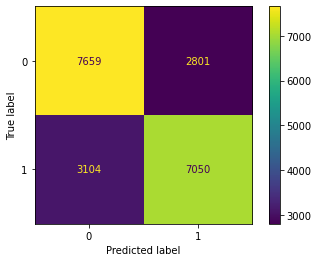

In [44]:
confusionmatrix= metrics.confusion_matrix(target_test,y_pred)
cmd=metrics.ConfusionMatrixDisplay(confusionmatrix)
cmd.plot()
plt.show()

In [45]:
confusionmatrix.sum()

20614